[0.010159986605679107, 0.010159986605679107, 0.010159986605679107, 0.010159986605679107, 0.9898400133943209, 0.010159986605679107, 0.010159986605679107, 0.010159986605679107, 0.010159986605679107]


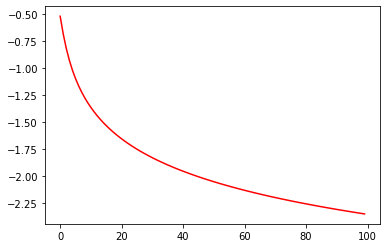

In [1]:
import math
import matplotlib.pyplot as plt

#========================global variable===========================
data_in = [0,0,0,0,1,0,0,0,0] #input data (O as example)
data_out = [0,0,0,0,0,0,0,0,0] #output data
latent = [0,0] #latent space data
temporary_latent = [0,0] #temporary variable for latent
weight = [[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0]]#weight parameter for both encoder and decoder
#first and second index are for encoder side while third and fourth index are for decoder side
bias= [0,0] #bias parameter
bias_output = [0,0,0,0,0,0,0,0,0,0] #output bias parameter

 #calculating output error
error_output_layer = [0,0,0,0,0,0,0,0,0]
error_hidden_layer = [0,0]
error_differential_output_layer = [[0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0]]
error_differential_input_weight = [[0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0]]
error_differential_bias = [0,0]
error_differential_bias_output = [0,0,0,0,0,0,0,0,0]

#scaler
miu = 1
#training related variable
training_iteration = 100
error_history =[]
weight_history =[]
temporary_error_history = 0
x_scale = []
#==================function definition==================

def sigmoid (x):
  return(1/(1+math.exp(-x)))

def ReLu (x):
  if (x>0):
    return x
  else : return 0

def gradient (x):
  return (1-sigmoid(x))*sigmoid(x)

def foward_propagation():
  #foward propagation
  loop_iteration = 9
  for iteration in range (loop_iteration) :
    latent[0] = latent[0]+ data_in[iteration]*weight[0][iteration]
    latent[1] = latent[1]+ data_in[iteration]*weight[1][iteration]

  latent[0] = latent[0]+bias[0]
  latent[1] = latent[1]+bias[1]

  temporary_latent = latent
  #passing ReLu function(hidden layer)
  latent[0] = ReLu(latent[0])
  latent[1] = ReLu(latent[1])

  for output_iteration in range(loop_iteration):
    data_out[output_iteration] = latent[0]*weight[2][output_iteration] + latent[1]*weight[3][output_iteration]

  for final_out in range(loop_iteration):
    data_out[final_out]=sigmoid(data_out[final_out]+bias_output[final_out])

def backward_propagation():
  #backward propagation
  loop_iteration = 9

  for i in range(loop_iteration):
    error_output_layer[i] = -1*data_in[i]*(1-data_out[i])+(1-data_in[i])*data_out[i]

  for i in range(loop_iteration):
    error_differential_output_layer[0][i] = error_output_layer[i]*latent[0]
    error_differential_output_layer[1][i] = error_output_layer[i]*latent[1]  

  for i in range(loop_iteration):
    error_hidden_layer[0] = error_output_layer[i]*weight[2][i]*gradient(temporary_latent[0]) + error_hidden_layer[0]
    error_hidden_layer[1] = error_output_layer[i]*weight[3][i]*gradient(temporary_latent[1]) + error_hidden_layer[0]

  for i in range(loop_iteration):
    error_differential_input_weight[0][i] = error_hidden_layer[0]*data_in[i]
    error_differential_input_weight[1][i] = error_hidden_layer[1]*data_in[i]

  error_differential_bias = error_hidden_layer
  error_differential_bias_output = error_output_layer

  #updating weight and bias value
  for update in range (9): #updating weight
    weight[2][update] = weight[2][update] - miu*error_differential_output_layer[0][update]
    weight[3][update] = weight[3][update] - miu*error_differential_output_layer[1][update]
    weight[0][update] = weight[0][update] - miu*error_differential_input_weight[0][update]
    weight[1][update] = weight[1][update] - miu*error_differential_input_weight[1][update]

  #updating both output bias and hidden layer bias
  for update in range(9): #updating output bias
    bias_output[update] = bias_output[update] - miu*error_differential_bias_output[update]


  #updating hidden layer bias
  bias[0] = bias[0] - miu*error_differential_bias[0]
  bias[1] = bias[1] - miu*error_differential_bias[1]

def cross_entropy_error(data_in,data_out):
  accumulator = 0
  for i in range (9):
    accumulator = accumulator + (data_in[i]*math.log(data_out[i],10)+((1-data_in[i])*math.log((1-data_out[i]),10)))
  accumulator = -(accumulator/9)
  return accumulator


#=============autoencoder start==================

for iteration in range(training_iteration):
  foward_propagation()
  backward_propagation()
  #error log
  x_scale.append(iteration)
  weight_history.append(data_out[0])
  temporary_error_history = cross_entropy_error(data_in,data_out)
  error_history.append((math.log(temporary_error_history,10)))

data_out
plt.plot(x_scale,error_history, color="red")
#plt.show()
